In [51]:
import pandas as pd
from IPython.core.display import display, HTML
data = pd.read_csv("train.csv")
df = pd.DataFrame(data)

      Sex  Survived  Number
0  female  0.742038     314
1    male  0.188908     577


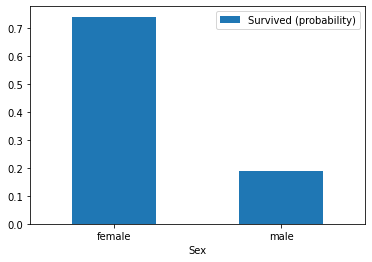

In [52]:
import matplotlib.pyplot as plt
%matplotlib inline
gender = df.groupby(['Sex'], as_index=False)['Survived'].apply(lambda x: x.sum()/len(x))
gender2 = df.groupby(['Sex'], as_index=False)['PassengerId'].apply(lambda x: len(x))
#print(gender2)
gender['Number'] = gender2['PassengerId']
#pcs = pd.DataFrame(pclass.keys())
display(HTML('<h3>Вероятность спасения женщин существенно превосходила вероятность спасения мужчин </h3>'))
print(gender)
gender.plot.bar(x = 'Sex', y='Survived', secondary_y=['Number'],  rot=0)
plt.legend(['Survived (probability)'])

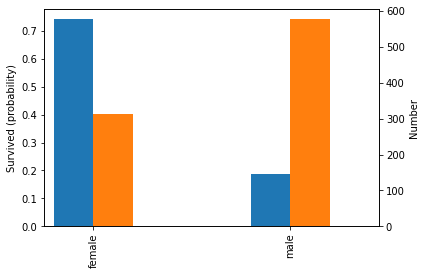

In [73]:
fig = plt.figure() # Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.

width = 0.2
display(HTML('<h3>Однако, количество мужчин на борту примерно в 2 раза было больше женщин</h3>'))

gender.Survived.plot(kind='bar', color='#1F77B4', x = 'Sex',  ax=ax, width=width, position=1)
gender.Number.plot(kind='bar', color='#FF7F0E',x = 'Sex', ax=ax2, width=width, position=0)
plt.xticks(range(0, gender.Sex.count()), labels=gender.Sex, rotation=0)
ax.set_ylabel('Survived (probability)')
ax2.set_ylabel('Number')
plt.show()

   Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363


<AxesSubplot:xlabel='Pclass'>

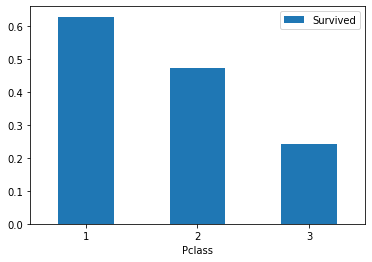

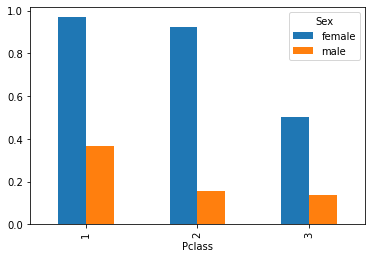

In [4]:
pclass = df.groupby(['Pclass'], as_index=False)['Survived'].apply(lambda x: x.sum()/len(x))
print(pclass)
pclass.plot.bar(x = 'Pclass', y='Survived',  rot=0)

display(HTML('<h3>Пассажиры с билетами первого класса (мужчины и женщины) имели более высокие шансы на спасение </h3>'))


pclass2 = df.groupby(['Pclass', 'Sex'])['Survived'].apply(lambda x: x.sum()/len(x)).unstack();
pclass2.plot.bar()

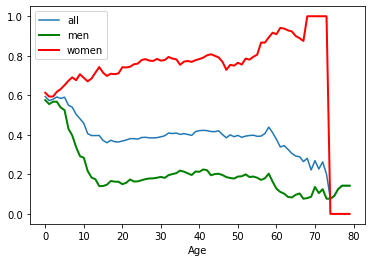

In [77]:
def f(x):
    ser = df[df['Age'].between(-10+x['Age'], x['Age']+10)]
    return ser.Survived.sum()/ser.count()
def fm(x):
    df2 = df.loc[df['Sex'] == 'male']
    ser = df2[df2['Age'].between(-10+x['Age'], x['Age']+10)]
    return ser.Survived.sum()/ser.count()
def ff(x):
    df2 = df.loc[df['Sex'] == 'female']
    ser = df2[df2['Age'].between(-10+x['Age'], x['Age']+10)]
    return ser.Survived.sum()/ser.count()


#ages['Rate'] = df.apply(f, axis=1)

display(HTML('<h3>Малолетние дети и женщины независимо от возраста имели преимущественное право на спасение</h3>'))

pp = pd.DataFrame({"Age":range(0,int(df['Age'].max())), 'Rate':range(0,int(df['Age'].max()))})
pp['Rate'] = pp.apply(f, axis=1)
pp['Rate'] = pp['Rate'].fillna(0)
pp.plot.line(x = 'Age', y='Rate',  rot=0)
pp2 = pd.DataFrame({"Age":range(0,int(df['Age'].max())), 'Rate':range(0,int(df['Age'].max()))})
pp2['Rate'] = pp2.apply(fm, axis=1)
pp2['Rate'] = pp2['Rate'].fillna(0)
pp3 = pd.DataFrame({"Age":range(0,int(df['Age'].max())), 'Rate':range(0,int(df['Age'].max()))})
pp3['Rate'] = pp3.apply(ff, axis=1)
pp3['Rate'] = pp3['Rate'].fillna(0)
plt.plot(pp2['Age'], pp2['Rate'], color='green', linewidth=2, markersize=1)
plt.plot(pp3['Age'], pp3['Rate'], color='red', linewidth=2, markersize=1)
plt.legend(['all', 'men', 'women'])

  TicketIsDigit  Survived
0         False  0.382609
1          True  0.384266


<AxesSubplot:xlabel='TicketNumber'>

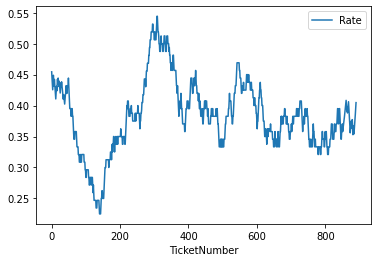

In [76]:
import re
def tik(x):
    delta = 40
    ser = df[df['TicketNumber'].between(-delta+x['TicketNumber'], x['TicketNumber']+delta)]
    return ser.Survived.sum()/ser.count()

#ages['Rate'] = df.apply(f, axis=1)
#df['Ticket']=df['Ticket'].apply(lambda x: re.sub("[^0-9]", "", x))
#df['Ticket'].fillna(0)   

#проверка обладают ли билеты с нетиповыми номерами (вуквенные или буквенно-цифровые) преимуществами
df['TicketIsDigit']=df['Ticket'].apply(lambda x: x.isdigit() )
tt = df.groupby(['TicketIsDigit'], as_index=False)['Survived'].apply(lambda x: x.sum()/len(x))
display(HTML('<h3>Нетиповой номер билета не является признаком привилегий (вероятность спасения не отличается)</h3>'))
print(tt)

#очистка данных и построение зависимости номера билета и вероятности выжить
df['TicketNumber']=df['Ticket'].apply(lambda x: re.sub('\D', '', x) )
df.TicketNumber = df.where(df.TicketNumber != '', 0)
tt2 = pd.DataFrame({"TicketNumber":range(int(df['TicketNumber'].min()),int(df['TicketNumber'].max())), 'Rate':range(int(df['TicketNumber'].min()),int(df['TicketNumber'].max()))})
tt2['Rate'] = tt2.apply(tik, axis=1)
tt2['Rate'] = tt2['Rate'].fillna(0)
display(HTML('<h3>Отдельный диапазон билетов [100; 200] был продан в часть судна с минимальной вероятностью спасения</h3>'))
tt2.plot.line(x = 'TicketNumber', y='Rate',  rot=0)

<AxesSubplot:xlabel='SibSp'>

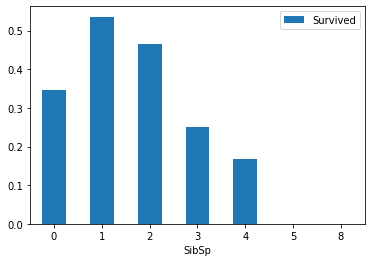

In [75]:
SibSp = df.groupby(['SibSp'], as_index=False)['Survived'].apply(lambda x: x.sum()/len(x))
display(HTML('<h3>Вероятность выжить максимальна при наличии одного супруга или брата или сестры</h3>'))
SibSp.plot.bar(x = 'SibSp', y='Survived',  rot=0)

<AxesSubplot:xlabel='Parch'>

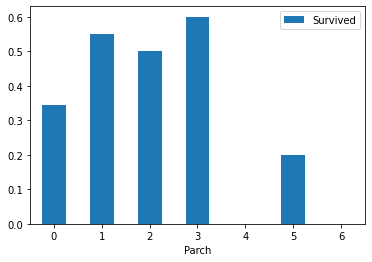

In [289]:
parch = df.groupby(['Parch'], as_index=False)['Survived'].apply(lambda x: x.sum()/len(x))
display(HTML('<h3>Путешествие с ребенком/родителем повышало вероятность выжить</h3>'))
parch.plot.bar(x = 'Parch', y='Survived',  rot=0)